# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [39]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import exchange_economy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

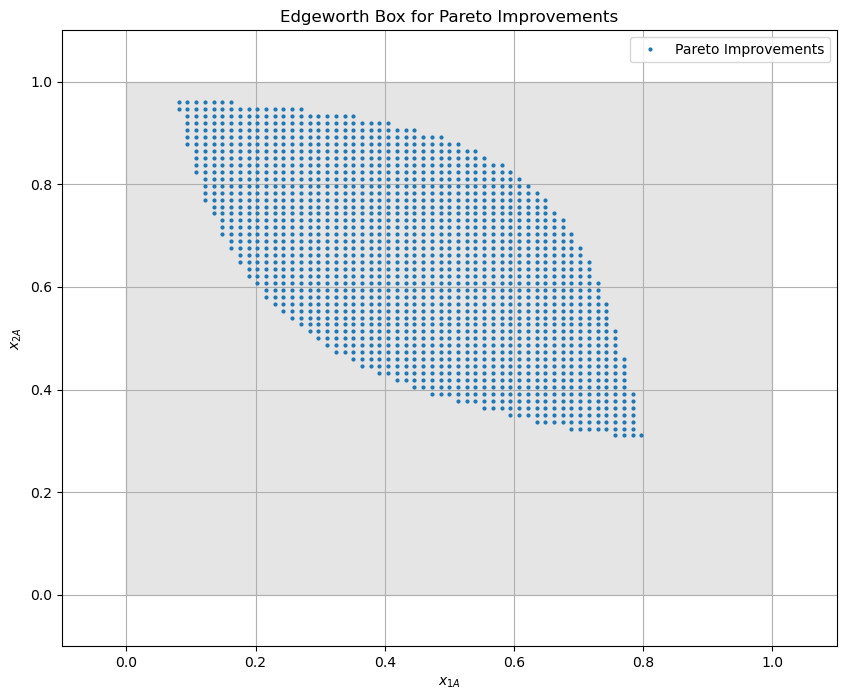

In [40]:
#Starting with refering to utillity-functions and conditions:
import matplotlib.pyplot as plt 

def demand_A(self, p1):
        p2 = 1  # Numeraire
        x1A = self.par.alpha / p1 * (self.par.w1A + p1/p2 * self.par.w2A)
        x2A = (1 - self.par.alpha) / p2 * (self.par.w1A + p1/p2 * self.par.w2A)
        return x1A, x2A

def demand_B(self, p1):
        p2 = 1  # Numeraire
        w1B = 1 - self.par.w1A  # Endowment of B for good 1
        w2B = 1 - self.par.w2A  # Endowment of B for good 2
        x1B = self.par.beta / p1 * (w1B + p1/p2 * w2B)
        x2B = (1 - self.par.beta) / p2 * (w1B + p1/p2 * w2B)
        return x1B, x2B


# Initialize the exchange economy
economy = ExchangeEconomyClass()

# Calculate the utility at endowment for both A and B
utility_endowment_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
utility_endowment_B = economy.utility_B(1 - economy.par.w1A, 1 - economy.par.w2A)

# Discretize the space
N = 75
x1A_values = np.linspace(0, 1, N)
x2A_values = np.linspace(0, 1, N)

# Initialize lists to hold Pareto improvements
pareto_x1A = []
pareto_x2A = []

# Check each combination
for x1A in x1A_values:
    for x2A in x2A_values:
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(x1B, x2B)

        # Check if both A and B are at least as well off
        if utility_A >= utility_endowment_A and utility_B >= utility_endowment_B:
            pareto_x1A.append(x1A)
            pareto_x2A.append(x2A)

# Plot the Pareto improvements in the Edgeworth box
plt.figure(figsize=(10, 8))
plt.plot(pareto_x1A, pareto_x2A, 'o', markersize=2, label='Pareto Improvements')
plt.title('Edgeworth Box for Pareto Improvements')
plt.xlabel('$x_{1A}$')
plt.ylabel('$x_{2A}$')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.grid(True)
black_box = plt.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='black', alpha=0.1)  # alpha controls transparency
plt.gca().add_patch(black_box)
plt.show()

# Question 2

Explain your code and procedure

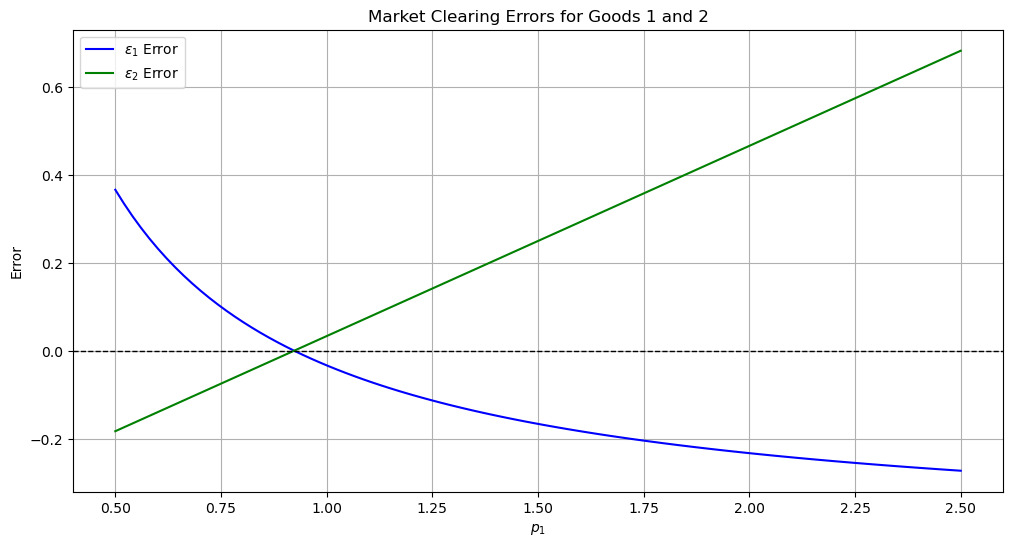

(0.9242424242424243, 0.0010514985924826026)

In [43]:
# Initialize the economy
economy = ExchangeEconomyClass()

# Set up the price range
N = 100  # Granularity
P1 = np.linspace(0.5, 2.5, N)

# Perform the calculations
market_clearing_errors = []
for p1 in P1:
    eps1, eps2 = economy.check_market_clearing(p1)
    market_clearing_errors.append((p1, eps1, eps2))

# Unpack the results for plotting
prices, errors_eps1, errors_eps2 = zip(*market_clearing_errors)

# Combine the plots for both errors
plt.figure(figsize=(12, 6))
plt.plot(prices, errors_eps1, label='$\epsilon_1$ Error', color='blue')
plt.plot(prices, errors_eps2, label='$\epsilon_2$ Error', color='green')
plt.title('Market Clearing Errors for Goods 1 and 2')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.axhline(0, color='black', lw=1, ls='--')  # Reference line at error = 0
plt.grid(True)
plt.legend()
plt.show()

# Calculate the price p1 that minimizes the sum of the absolute errors
absolute_errors_sum = [abs(e1) + abs(e2) for e1, e2 in zip(errors_eps1, errors_eps2)]
min_error_index = np.argmin(absolute_errors_sum)
optimal_p1 = prices[min_error_index]
min_error = absolute_errors_sum[min_error_index]

optimal_p1, min_error

# Question 3

Explain your code and procedure

In [ ]:
#Example text223

ADD CONCISE CONLUSION.